In [1]:
import pandas as pd

df_train = pd.read_csv('../data/dataframe_train.csv')

In [2]:
df_train.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,...,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Jour,Mois,Date
0,A013010004908126703060931,78643044,0,20.00,1,0.0,0.0,0.0,551.0,0.000000,...,1.0,4.000000,4.0,4.0,20.00,0.00,27134,1,2,2017-02-01
1,A013011306908024927155000,78643045,0,20.00,1,0.0,0.0,0.0,551.0,0.000000,...,2.0,1.797685,4.0,4.0,28.61,8.61,27817,1,2,2017-02-01
2,A013010002908283134592527,78643046,0,57.64,1,0.0,0.0,0.0,549.0,0.000000,...,1.0,4.000000,4.0,4.0,57.64,0.00,28058,1,2,2017-02-01
3,A011010002908105209831316,78643047,0,54.29,0,1.0,1.0,1.0,267.0,0.000000,...,1.0,4.000000,4.0,4.0,54.29,0.00,28128,1,2,2017-02-01
4,A013010041908000125652029,78643048,0,26.90,1,0.0,0.0,0.0,549.0,0.003769,...,1.0,1.997106,4.0,4.0,59.15,32.25,29607,1,2,2017-02-01


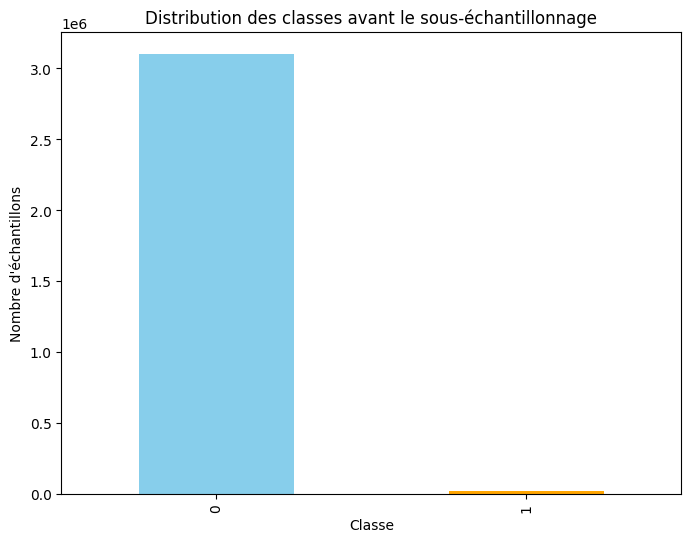

In [3]:
import pandas as pd
from imblearn.under_sampling import EditedNearestNeighbours
import matplotlib.pyplot as plt

X = df_train.drop(['ZIBZIN','IDAvisAutorisationCheque','FlagImpaye','Date'], axis=1)
y = df_train['FlagImpaye']

# Créer un DataFrame pour faciliter la manipulation des données
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

# Appliquer le sous-échantillonnage avec Edited Nearest Neighbours
enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3, kind_sel='all')
X_resampled, y_resampled = enn.fit_resample(X, y)

# Créer un DataFrame pour le nouvel ensemble d'entraînement
df_resampled = pd.DataFrame(X_resampled, columns=[f'feature_{i}' for i in range(X_resampled.shape[1])])
df_resampled['target'] = y_resampled

# Afficher la distribution des classes après le sous-échantillonnage
plt.figure(figsize=(8, 6))
df_resampled['target'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution des classes après le sous-échantillonnage (ENN)')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')
plt.show()

In [ ]:
df_train.to_csv('../data/undersampling/dataframe_train.csv',index=False)